In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("co1d7era/mixedtype-wafer-defect-datasets")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/co1d7era/mixedtype-wafer-defect-datasets/versions/3


In [4]:
import os

In [5]:
from google.colab import files

pdf_path = os.path.join(path, 'E.pdf')
files.download(pdf_path)  # Downloads the PDF file to your computer


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
import os
import numpy as np

 # Load the .npz file
file_path = os.path.join(path, 'Wafer_Map_Datasets.npz')

data = np.load(file_path)

 # Check the keys in the .npz file
print("Keys in the dataset:", data.files)

 # Inspect the first key's data
for key in data.files:
     print(f"Data for key '{key}':", data[key])
     break  # View just the first key to avoid overload


Keys in the dataset: ['arr_0', 'arr_1']
Data for key 'arr_0': [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


Key: arr_0, Shape: (38015, 52, 52), Dtype: int32
Array 'arr_0' might be an image. Displaying a sample...


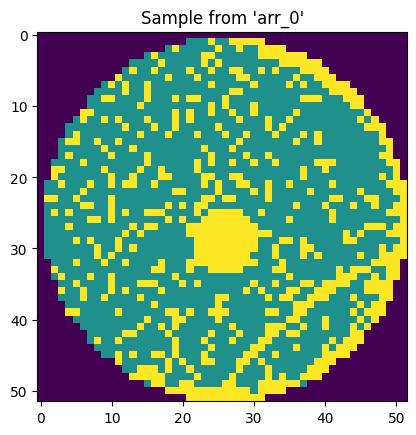

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Load the .npz file
file_path = os.path.join(path, 'Wafer_Map_Datasets.npz')
data = np.load(file_path)

# Check each array to see if it's an image
for key in data.files:
    array = data[key]
    print(f"Key: {key}, Shape: {array.shape}, Dtype: {array.dtype}")

                # Check if it's likely an image
    if len(array.shape) in [2, 3]:  # 2D (grayscale) or 3D (RGB)
       print(f"Array '{key}' might be an image. Displaying a sample...")

                                    # Display the first image
       plt.imshow(array[0], cmap='gray' if array.ndim == 2 else None)
       plt.title(f"Sample from '{key}'")
       plt.show()
       break


In [8]:
images = data['arr_0']
print(f"Shape of images: {images.shape}")


Shape of images: (38015, 52, 52)


In [9]:
labels = data['arr_1']

# Check the shapes of images and labels
print(f"Shape of images: {images.shape}")
print(f"Shape of labels: {labels.shape}")

Shape of images: (38015, 52, 52)
Shape of labels: (38015, 8)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


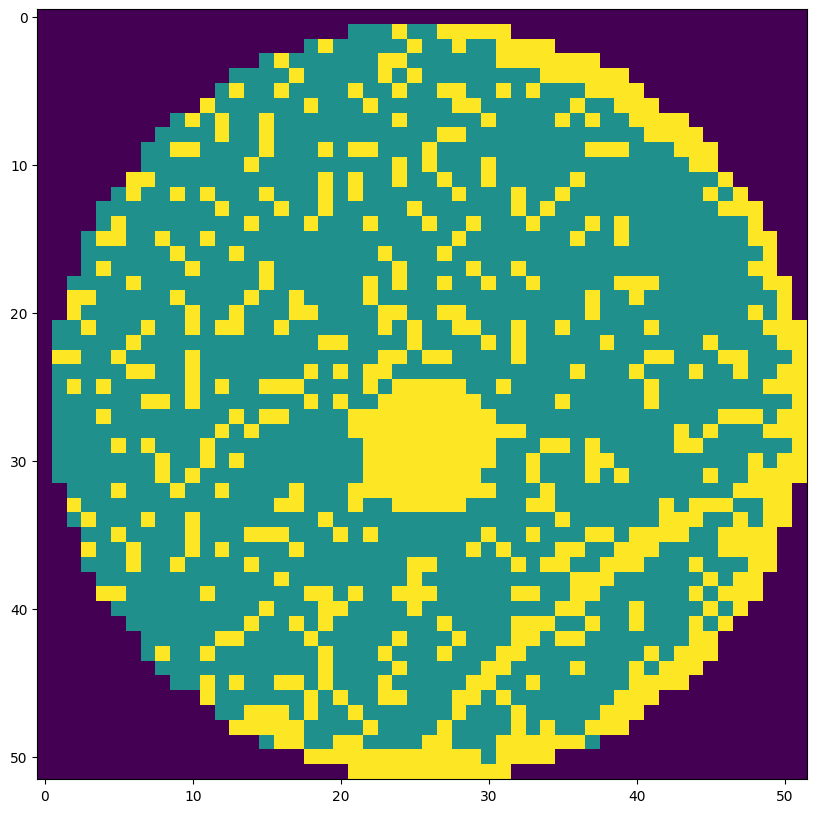

In [10]:
print(images[0])
plt.figure(figsize=(10,10))
plt.imshow(images[0])

In [11]:
from sklearn.model_selection import train_test_split

# Split data into training, validation, and test sets
x_train, x_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set: {x_train.shape}, Validation set: {x_val.shape}, Test set: {x_test.shape}")


Training set: (26610, 52, 52), Validation set: (5702, 52, 52), Test set: (5703, 52, 52)


In [12]:
print(x_train[26609].shape)

(52, 52)


In [13]:
type(x_train)

numpy.ndarray

In [14]:
print(labels[0])

[1 0 1 0 0 0 1 0]


In [15]:
import torch

# Assuming x_train, x_val, x_test are your NumPy arrays
x_train_tensor = torch.from_numpy(x_train)
x_val_tensor = torch.from_numpy(x_val)
x_test_tensor = torch.from_numpy(x_test)

# Do the same for your labels (y_train, y_val, y_test)
y_train_tensor = torch.from_numpy(y_train)
y_val_tensor = torch.from_numpy(y_val)
y_test_tensor = torch.from_numpy(y_test)

In [16]:
y_test_tensor.shape

torch.Size([5703, 8])

In [17]:
y_test_integers = torch.argmax(y_test_tensor, dim=1)

In [65]:
y_valid_integers = torch.argmax(y_val_tensor, dim=1)

In [18]:
type(x_train_tensor)

torch.Tensor

In [19]:
y_train_tensor.shape

torch.Size([26610, 8])

In [20]:
y_train_integers = torch.argmax(y_train_tensor, dim=1)


In [21]:
y_train_integers.shape

torch.Size([26610])

In [22]:
import torch
import torch.nn as nn

In [43]:
import torch.nn as nn


In [47]:
import torch.nn as nn

class OneConv(nn.Module):
    def __init__(self):
        super(OneConv, self).__init__()

        # Convolutional layers
        self.conv = nn.Conv2d(in_channels=1, out_channels=9, kernel_size=(5, 5))
        self.flatten = nn.Flatten()
        # The output of the convolutional layer is 9 channels, 48x48 (52 input - 5 kernel + 1 padding on each side = 48)
        # So the flattened size is 9 * 48 * 48
        self.fc = nn.Linear(9 * 48 * 48, 8)  # Output size is 8

    def forward(self, x):
        # Pass through convolutional layers
        x = nn.functional.relu(self.conv(x))

        # Flatten the output from convolutional layers
        x = self.flatten(x)

        # Pass through fully connected layers
        x = nn.functional.log_softmax(self.fc(x), dim=1)
        return x

In [24]:
!pip install torchviz

In [38]:
from torchviz import make_dot
import torch


In [48]:
net = OneConv()

In [49]:
dummy_input = torch.randn( 1,1, 52, 52)

In [50]:
output=net(dummy_input)

In [52]:
dot = make_dot(output, params=dict(net.named_parameters()))

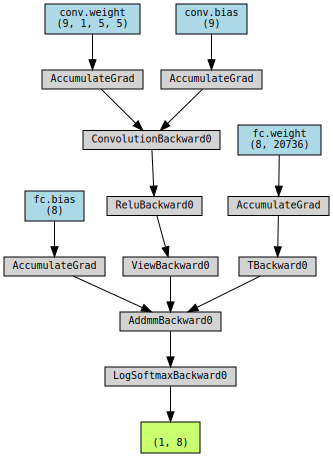

In [53]:
dot.format = "svg"  # Set the format to SVG for inline display
display(dot)  # Directly render in the Colab notebook


In [54]:

import torch.optim as optim

In [56]:
model = OneConv()
loss_function = nn.NLLLoss()  # Negative Log-Likelihood Loss
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [58]:
# Training loop
epochs = 100
for epoch in range(epochs):
    # Forward pass
    # Reshape x_train_tensor to have 1 channel
    y_pred = model(x_train_tensor.float().unsqueeze(1))  # Add channel dimension
    # Compute loss
    loss = loss_function(y_pred, y_train_integers)
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item()}')

Epoch [1/100], Loss: 2.0959341526031494
Epoch [2/100], Loss: 10.484537124633789
Epoch [3/100], Loss: 2.1259822845458984
Epoch [4/100], Loss: 1.9852299690246582
Epoch [5/100], Loss: 1.8769118785858154
Epoch [6/100], Loss: 1.7920408248901367
Epoch [7/100], Loss: 1.7265015840530396
Epoch [8/100], Loss: 1.6775518655776978
Epoch [9/100], Loss: 1.6423934698104858
Epoch [10/100], Loss: 1.6178736686706543
Epoch [11/100], Loss: 1.6008727550506592
Epoch [12/100], Loss: 1.5887874364852905
Epoch [13/100], Loss: 1.5797840356826782
Epoch [14/100], Loss: 1.5727211236953735
Epoch [15/100], Loss: 1.5669028759002686
Epoch [16/100], Loss: 1.5618947744369507
Epoch [17/100], Loss: 1.5574580430984497
Epoch [18/100], Loss: 1.5534385442733765
Epoch [19/100], Loss: 1.5497300624847412
Epoch [20/100], Loss: 1.5462948083877563
Epoch [21/100], Loss: 1.5430817604064941
Epoch [22/100], Loss: 1.5400077104568481
Epoch [23/100], Loss: 1.5370283126831055
Epoch [24/100], Loss: 1.5341176986694336
Epoch [25/100], Loss: 1.5

In [60]:
test_loss = 0
correct = 0
total = 0

In [61]:
y_test_integers.shape

torch.Size([5703])

In [64]:
with torch.no_grad():
    for i in range(len(x_test_tensor)):  # Iterate over the length of the test set
        # Forward pass: Get predictions from the model
        # Correctly reshape to [batch_size, channels, height, width] which is [1, 1, 52, 52]
        pred = model(x_test_tensor[i].float().unsqueeze(0).unsqueeze(0))
        # Calculate the loss
        loss = loss_function(pred, y_test_integers[i].unsqueeze(0)).item() # Add an extra dimension to labels
        test_loss += loss  # Accumulate the loss

        # Get the predicted class labels
        _, predicted = torch.max(pred, 1)  # pred contains raw output (logits), so we use torch.max to get the predicted class index

        # Calculate the number of correct predictions
        total += 1  # Increment total by 1 for each sample
        correct += (predicted == y_test_integers[i]).sum().item()  # Compare with the correct label

    # Calculate the average test loss
    average_test_loss = test_loss / len(x_test_tensor)

    # Calculate the accuracy
    accuracy = 100 * correct / total

    print(f'Average Test Loss: {average_test_loss:.4f}')
    print(f'Accuracy: {accuracy:.2f}%')

Average Test Loss: 0.9992
Accuracy: 65.11%


In [66]:
val_loss = 0
correct = 0
total = 0

In [70]:
with torch.no_grad():
    for i in range(len(x_val_tensor)):  # Iterate over the length of the test set
        # Forward pass: Get predictions from the model
        # Correctly reshape to [batch_size, channels, height, width] which is [1, 1, 52, 52]
        pred = model(x_val_tensor[i].float().unsqueeze(0).unsqueeze(0))
        # Calculate the loss
        loss = loss_function(pred, y_valid_integers[i].unsqueeze(0)).item() # Add an extra dimension to labels
        val_loss += loss  # Accumulate the loss

        # Get the predicted class labels
        _, predicted = torch.max(pred, 1)  # pred contains raw output (logits), so we use torch.max to get the predicted class index

        # Calculate the number of correct predictions
        total += 1  # Increment total by 1 for each sample
        correct += (predicted == y_valid_integers[i]).sum().item()  # Compare with the correct label

    # Calculate the average test loss
    average_val_loss = val_loss / len(x_val_tensor)

    # Calculate the accuracy
    accuracy = 100 * correct / total

    print(f'Average Val Loss: {average_val_loss:.4f}')
    print(f'Accuracy: {accuracy:.2f}%')

Average Val Loss: 3.9691
Accuracy: 66.40%
